In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [48]:
df_train = pd.read_excel("assets/data_split.xlsx", 'train_45').sample(frac=1)
df_train.head()

,Unnamed: 0,190,191,192,193,194,195,196,197,198,...,793,794,795,796,797,798,799,800,label,encode
30,31,0.6392,0.6379,0.6224,0.6337,0.6489,0.6330,0.6230,0.6354,0.6547,...,-0.0058,-0.0060,-0.0063,-0.0063,-0.0060,-0.0058,-0.0058,-0.0057,THTM 02,1
29,30,0.5038,0.4977,0.4975,0.5132,0.5392,0.5438,0.5349,0.5315,0.5415,...,-0.0099,-0.0101,-0.0101,-0.0104,-0.0105,-0.0101,-0.0098,-0.0097,THTM 01,1
3,4,0.6281,0.6499,0.6559,0.6435,0.6595,0.6586,0.6535,0.6747,0.6989,...,-0.0033,-0.0032,-0.0033,-0.0035,-0.0032,-0.0031,-0.0034,-0.0032,CV,0
24,25,0.7076,0.6937,0.6870,0.6903,0.7114,0.7295,0.7236,0.7209,0.7051,...,-0.0098,-0.0098,-0.0096,-0.0096,-0.0097,-0.0097,-0.0095,-0.0092,Vfresh,1
14,15,0.4992,0.5085,0.5064,0.5067,0.5174,0.5105,0.5058,0.5056,0.5078,...,-0.0057,-0.0057,-0.0062,-0.0063,-0.0060,-0.0058,-0.0060,-0.0060,HG05,0


In [49]:
df_test = pd.read_excel("assets/data_split.xlsx", 'test').sample(frac=1)
df_test.head()

,Unnamed: 0,190,191,192,193,194,195,196,197,198,...,793,794,795,796,797,798,799,800,label,encode
11,12,0.3028,0.2996,0.2870,0.2860,0.2867,0.2809,0.2994,0.3076,0.3159,...,0.0263,0.0261,0.0257,0.0257,0.0261,0.0261,0.0259,0.0260,FANTA,1
5,6,0.8228,0.8057,0.7748,0.7803,0.7815,0.7922,0.8301,0.8398,0.8433,...,0.0281,0.0282,0.0281,0.0279,0.0277,0.0279,0.0280,0.0282,LC,0
4,5,0.7681,0.7654,0.7774,0.7938,0.7967,0.8009,0.7939,0.8121,0.8240,...,0.0079,0.0078,0.0079,0.0080,0.0079,0.0079,0.0083,0.0086,HamY06,0
8,9,0.5940,0.6032,0.6025,0.6016,0.6185,0.6168,0.6141,0.6174,0.6139,...,-0.0014,-0.0015,-0.0018,-0.0020,-0.0019,-0.0019,-0.0018,-0.0015,VFRESH 01,1
10,11,0.4622,0.4621,0.4647,0.4557,0.4536,0.4679,0.4728,0.4582,0.4565,...,-0.0007,-0.0009,-0.0009,-0.0009,-0.0007,-0.0006,-0.0007,-0.0006,TM 04,1


In [50]:
df_validate = pd.read_excel("assets/data_split.xlsx", 'validate').sample(frac=1)
df_validate.head()

,Unnamed: 0,190,191,192,193,194,195,196,197,198,...,793,794,795,796,797,798,799,800,label,encode
4,42,0.5732,0.5820,0.5904,0.5946,0.6068,0.6257,0.6331,0.6259,0.6349,...,-0.0010,-0.0013,-0.0017,-0.0016,-0.0013,-0.0012,-0.0013,-0.0010,VFRESH 03,1
3,35,0.5578,0.5710,0.5544,0.5391,0.5574,0.5698,0.5667,0.5744,0.5862,...,-0.0087,-0.0087,-0.0087,-0.0087,-0.0087,-0.0087,-0.0084,-0.0082,THTM 05,1
0,6,0.6041,0.5992,0.5847,0.6007,0.6337,0.6228,0.6201,0.6239,0.6475,...,-0.0024,-0.0026,-0.0025,-0.0024,-0.0025,-0.0025,-0.0023,-0.0021,GL02,0
1,10,0.5924,0.5965,0.5997,0.5998,0.5952,0.5929,0.6076,0.6153,0.6029,...,0.0097,0.0093,0.0092,0.0095,0.0094,0.0091,0.0095,0.0098,HamY04,0
2,48,0.2276,0.2291,0.2273,0.2340,0.2429,0.2332,0.2331,0.2513,0.2636,...,-0.0039,-0.0041,-0.0042,-0.0041,-0.0041,-0.0040,-0.0039,-0.0038,FANTA 04,1


In [51]:
y_train = df_train.iloc[:, -1]
y_test = df_test.iloc[:, -1]
y_validate = df_validate.iloc[:, -1]
y_validate

4    1
3    1
0    0
1    0
2    1
Name: encode, dtype: int64

In [52]:
X_train = df_train.drop(["label", "encode"], axis=1).iloc[:, 1:]
X_test = df_test.drop(["label", "encode"], axis=1).iloc[:, 1:]
X_validate = df_validate.drop(["label", "encode"], axis=1).iloc[:, 1:]
X_validate

,190,191,192,193,194,195,196,197,198,199,...,791,792,793,794,795,796,797,798,799,800
4,0.5732,0.5820,0.5904,0.5946,0.6068,0.6257,0.6331,0.6259,0.6349,0.6484,...,-0.0014,-0.0012,-0.0010,-0.0013,-0.0017,-0.0016,-0.0013,-0.0012,-0.0013,-0.0010
3,0.5578,0.5710,0.5544,0.5391,0.5574,0.5698,0.5667,0.5744,0.5862,0.6030,...,-0.0085,-0.0086,-0.0087,-0.0087,-0.0087,-0.0087,-0.0087,-0.0087,-0.0084,-0.0082
0,0.6041,0.5992,0.5847,0.6007,0.6337,0.6228,0.6201,0.6239,0.6475,0.6650,...,-0.0025,-0.0023,-0.0024,-0.0026,-0.0025,-0.0024,-0.0025,-0.0025,-0.0023,-0.0021
1,0.5924,0.5965,0.5997,0.5998,0.5952,0.5929,0.6076,0.6153,0.6029,0.6228,...,0.0092,0.0096,0.0097,0.0093,0.0092,0.0095,0.0094,0.0091,0.0095,0.0098
2,0.2276,0.2291,0.2273,0.2340,0.2429,0.2332,0.2331,0.2513,0.2636,0.2614,...,-0.0041,-0.0039,-0.0039,-0.0041,-0.0042,-0.0041,-0.0041,-0.0040,-0.0039,-0.0038


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validate_scaled = scaler.transform(X_validate)

In [54]:
n_components = 6
pca = PCA(n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_validate_pca = pca.transform(X_validate_scaled)

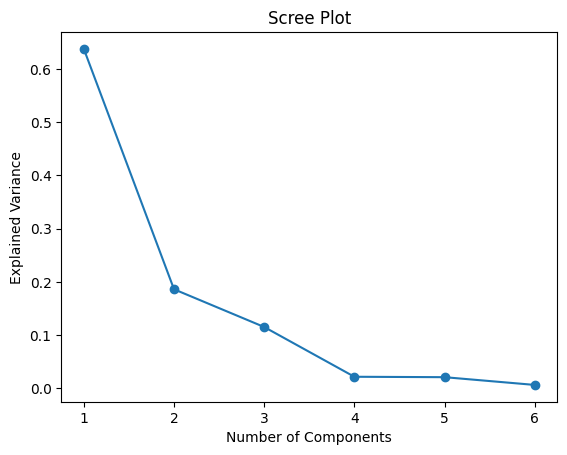

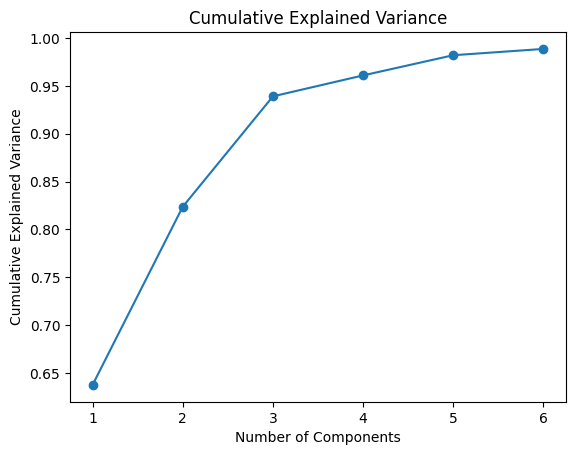

In [55]:
explained_variance = pca.explained_variance_ratio_
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

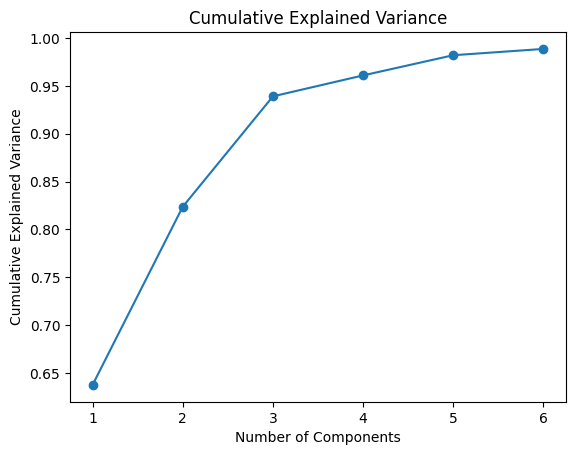

In [56]:
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

In [57]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train_pca, y_train)
LR.predict(X_test_pca)
LR.score(X_test_pca, y_test)

0.9230769230769231

(array([3., 2., 7., 6., 7., 7., 4., 3., 3., 3.]),
 array([-7.02511183, -5.56054769, -4.09598356, -2.63141942, -1.16685529,
         0.29770885,  1.76227298,  3.22683712,  4.69140125,  6.15596539,
         7.62052952]),
 <BarContainer object of 10 artists>)

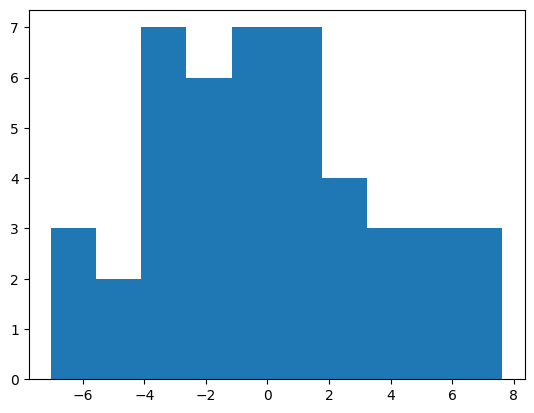

In [64]:
plt.hist(X_train_pca[:, 3])

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
NB = GaussianNB().fit(X_train_pca, y_train)
y_pred = NB.predict(X_test_pca)
accuracy_score(y_test, y_pred)

1.0